In [1]:
 import matplotlib.pyplot as plt
 import util
 import trainAgg
 
 train_loader, val_loader, test_loader = util.make_loaders(batch_size=16)

Reading GeoDataFrame...
Done
Generating list of useful chips
2781


In [2]:
model = trainAgg.End2EndAggregationModule(use_pretrained=False)
model = model.load_from_checkpoint('/u/pop-d1/grad/cgar222/Projects/disaggregation/aggregation/lightning_logs/version_155/checkpoints/epoch=160-step=67297.ckpt', use_pretrained=False)

In [3]:
#image_grid, seg_grid, value_grid = util.get_grids(model, train_loader)

In [4]:
#image_grid.shape

In [5]:
#fig, axs = plt.subplots(2,1,figsize=(30,15))
#axs[0].imshow(image_grid.permute(1,2,0))
#axs[0].axis('off')
#axs[0].set_title("Image")
#axs[1].imshow(seg_grid.permute(1,2,0))
#axs[1].axis('off')
#axs[1].imshow(value_grid[0])
#axs[1].axis('off')
#axs[1].set_title("Value Map")
#fig.tight_layout()
#plt.savefig('/u/pop-d1/grad/cgar222/Projects/disaggregation/Plots/MAE_test.jpg')

In [6]:
import torch

with torch.no_grad():
        for batch in train_loader:
            x, mask, value = batch
    
            values = model.get_valOut(x)

            break



/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively imp

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/torch/utils/data/dataset.py", line 272, in __getitem__
    return self.dataset[self.indices[idx]]
  File "/mounts/u-pop-d1/grad/cgar222/Projects/disaggregation/aggregation/data_factory.py", line 95, in __getitem__
    dasy = generate_dasymetric_map(polygons, img_bbox)
  File "/mounts/u-pop-d1/grad/cgar222/Projects/disaggregation/aggregation/data_factory.py", line 146, in generate_dasymetric_map
    fig = polygons.plot(column = 'TOTAL_MV1', alpha = 1, linewidth=3, extent = img_bbox)
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/geodataframe.py", line 921, in plot
    return plot_dataframe(self, *args, **kwargs)
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/plotting.py", line 723, in plot_dataframe
    ax, polys, subset, vmin=mn, vmax=mx, cmap=cmap, **style_kwds
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/plotting.py", line 144, in _plot_polygon_collection
    _expand_kwargs(kwargs, multiindex)
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/plotting.py", line 86, in _expand_kwargs
    kwargs[att] = np.take(value, multiindex, axis=0)
  File "<__array_function__ internals>", line 6, in take
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py", line 191, in take
    return _wrapfunc(a, 'take', indices, axis=axis, out=out, mode=mode)
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py", line 55, in _wrapfunc
    return _wrapit(obj, method, *args, **kwds)
  File "/localdisk1/SCRATCH/cgar222/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py", line 44, in _wrapit
    result = getattr(asarray(obj), method)(*args, **kwds)
IndexError: index 4 is out of bounds for axis 0 with size 4


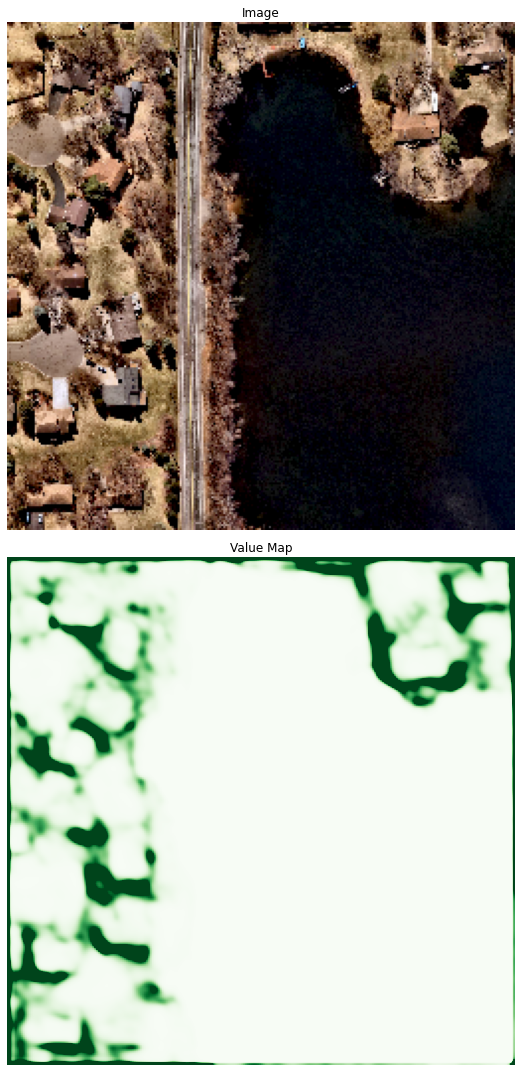

In [35]:
fig, axs = plt.subplots(2,1,figsize=(10,15))
axs[0].imshow(x[2].permute(1,2,0))
axs[0].axis('off')
axs[0].set_title("Image")
#axs[1].imshow(seg_grid.permute(1,2,0))
#axs[1].axis('off')
axs[1].imshow(values[2].permute(1,2,0), vmin = 0.0, vmax = 0.0001, cmap = 'Greens')
axs[1].axis('off')
axs[1].set_title("Value Map")
fig.tight_layout()
plt.savefig('/u/pop-d1/grad/cgar222/Projects/disaggregation/Plots/Single.jpg')